## Weak Zeeman

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [2]:
data = pd.read_csv('./data/weak.csv')

In [3]:
a, b = 0.03303344, 0.54045785
a_err, b_err = 1.60039105e-05, 1.79109926e-04

n = 11
R = 0.164084
R_err = 0.000254
mu_0 = 1.25663706127e-6
mu_B = 9.2740100657e-24
h = 6.62607015e-34

In [4]:
# Energy
f = data['f']
f_err = data['f_err']
E = h * f
E_err = h * f_err

# Rubidium Isotope 1
v85 = data['v85']
v85_err = data['v85_err']
i85 = a * v85 + b
i85_err = i85 * np.sqrt((v85_err/v85) ** 2 + (a_err/a) ** 2)
b85 = ((4/5) ** (3/2)) * mu_0 * n * i85/R
b85_err = b85 * np.sqrt((i85_err/i85) ** 2 + (R_err/R) ** 2)

# Rubidium Isotope 2
v87 = data['v87']
v87_err = data['v87_err']
i87 = a * v87 + b
i87_err = i87 * np.sqrt((v87_err/v87) ** 2 + (a_err/a) ** 2)
b87 = ((4/5) ** (3/2)) * mu_0 * n * i87/R
b87_err = b87 * np.sqrt((i87_err/i87) ** 2 + (R_err/R) ** 2)

## Theory

### Helmholtz coil

$B = (\frac{4}{5})^{3/2} \frac{\mu_0 n I}{R}$

### Zeeman energy levels

$\Delta E = h \nu = \mu_B g_f B$

$B = \frac{1}{g_f} \frac{\Delta E}{\mu_B} = \frac{1}{g_f} \frac{h \nu}{\mu_B}$

### Source of bias

$\Delta E = h \nu = \mu_B g_f (B + B_{env})$

$B = \frac{1}{g_f} \frac{\Delta E}{\mu_B} - B_{env}$


## Fit

In [17]:
x, y, y_err = E/mu_B, b85, b85_err


Converged with chi-squared 0.04
Number of degrees of freedom, dof = 5.00
Reduced chi-squared 0.01

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 0.000e+00                | 2.810e+00                | 2.566e-01               
1           | 4.288e-05                | 3.287e-05                | 1.161e-06               


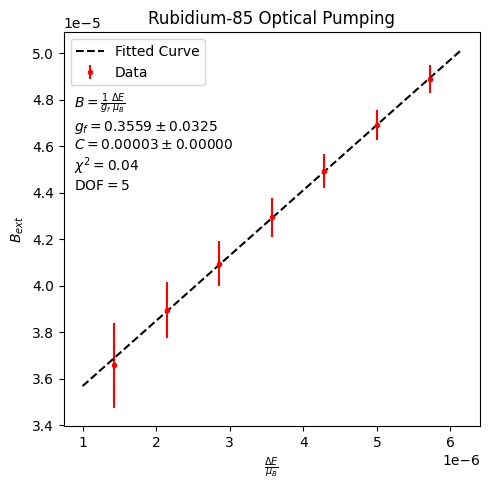

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

params_0 = [0, y.mean()]
params, params_err, chisq, dof = data_fit(params_0, linear, x, y, y_err)

ax.errorbar(
    x, y, y_err, 
    color='red', 
    fmt='.', 
    label='Data'
)

g = params[0] ** -1
g_err = params_err[0] * params[0] ** -2

x_padding = (x.max() - x.min()) * 0.1
linspace = np.linspace(x.min()-x_padding, x.max()+x_padding)
ax.plot(linspace, linear(params, linspace), color='black', linestyle='dashed', label='Fitted Curve')

txt = '$B = \\frac{{1}}{{g_f}} \\frac{{\Delta E}}{{\mu_B}}$ \n'
txt += f'$g_f = {g:.4f} \\pm {g_err:.4f}$ \n'
txt += f'$C = {params[1]:.5f} \\pm {params_err[1]:.5f}$ \n'
txt += f'$\\chi^2 = {chisq:.2f}$ \n'
txt += f'DOF$ = {dof}$'
ax.text(0.025, 0.85, txt, transform=ax.transAxes , fontsize=10, va='top');

ax.set_ylabel('$B_{ext}$')
ax.set_xlabel('$\\frac{{\Delta E}}{{\mu_B}}$')
ax.set_title('Rubidium-85 Optical Pumping')
ax.legend(loc='upper left')

plt.tight_layout()

In [22]:
x, y, y_err = E/mu_B, b87, b87_err


Converged with chi-squared 0.42
Number of degrees of freedom, dof = 5.00
Reduced chi-squared 0.08

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 0.000e+00                | 2.044e+00                | 3.528e-01               
1           | 3.958e-05                | 3.228e-05                | 1.625e-06               


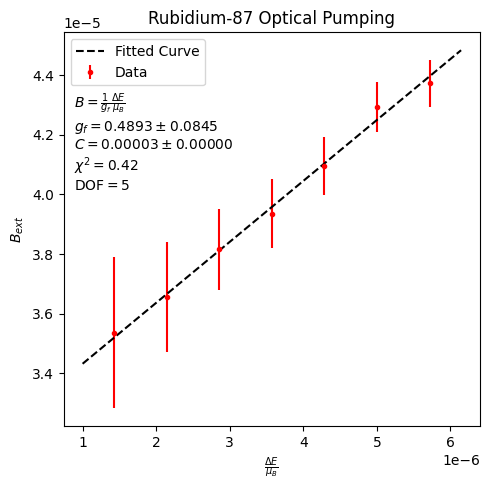

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

params_0 = [0, y.mean()]
params, params_err, chisq, dof = data_fit(params_0, linear, x, y, y_err)

ax.errorbar(
    x, y, y_err, 
    color='red', 
    fmt='.', 
    label='Data'
)

g = params[0] ** -1
g_err = params_err[0] * params[0] ** -2

x_padding = (x.max() - x.min()) * 0.1
linspace = np.linspace(x.min()-x_padding, x.max()+x_padding)
ax.plot(linspace, linear(params, linspace), color='black', linestyle='dashed', label='Fitted Curve')

txt = '$B = \\frac{{1}}{{g_f}} \\frac{{\Delta E}}{{\mu_B}}$ \n'
txt += f'$g_f = {g:.4f} \\pm {g_err:.4f}$ \n'
txt += f'$C = {params[1]:.5f} \\pm {params_err[1]:.5f}$ \n'
txt += f'$\\chi^2 = {chisq:.2f}$ \n'
txt += f'DOF$ = {dof}$'
ax.text(0.025, 0.85, txt, transform=ax.transAxes , fontsize=10, va='top');

ax.set_ylabel('$B_{ext}$')
ax.set_xlabel('$\\frac{{\Delta E}}{{\mu_B}}$')
ax.set_title('Rubidium-87 Optical Pumping')
ax.legend(loc='upper left')

plt.tight_layout()

In [25]:
g_err

0.08448421570059322